# Result Analyze

Analyze DeepAR forecast result using sMAPE.

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd

## Load Result

Load result using pandas.read_csv.

In [7]:
result = pd.read_csv('data/deepar-predict-result.csv')
result.head()

,date,store_id,y_label,y_pred
0,2019-09-24,0,157.2,12.363743
1,2019-09-25,0,125.2,8.149283
2,2019-09-26,0,154.4,17.012093
3,2019-09-27,0,174.1,10.019235
4,2019-09-28,0,27.0,12.105393


## Group Result

Group result using pandas.groupby.

In [8]:
result_group = result.groupby(['store_id'])
tss = []
forecasts = []
for name, group in result_group:
    ts = list(group['y_label'].values)
    forecast = list(group['y_pred'].values)
    tss.append(ts)
    forecasts.append(forecast)
target = np.array(tss)
forecast = np.array(forecasts)

## Calculate sMAPE

Define a function called smape, and calculate sMAPE.

In [9]:
def smape(target, forecast):
    r"""
    .. math::
        smape = mean(2 * |Y - Y_hat| / (|Y| + |Y_hat|))
    https://www.m4.unic.ac.cy/wp-content/uploads/2018/03/M4-Competitors-Guide.pdf
    """

    denominator = np.abs(target) + np.abs(forecast)
    flag = denominator == 0

    smape = 2 * np.mean(
        (np.abs(target - forecast) * (1 - flag)) / (denominator + flag)
    )
    return smape

In [10]:
smape_values = []
for i in range(len(target)):
    smape_value = smape(target[i], forecast[i])
    smape_values.append(smape_value)

## Show Result

Show sMAPE result using bar plot.

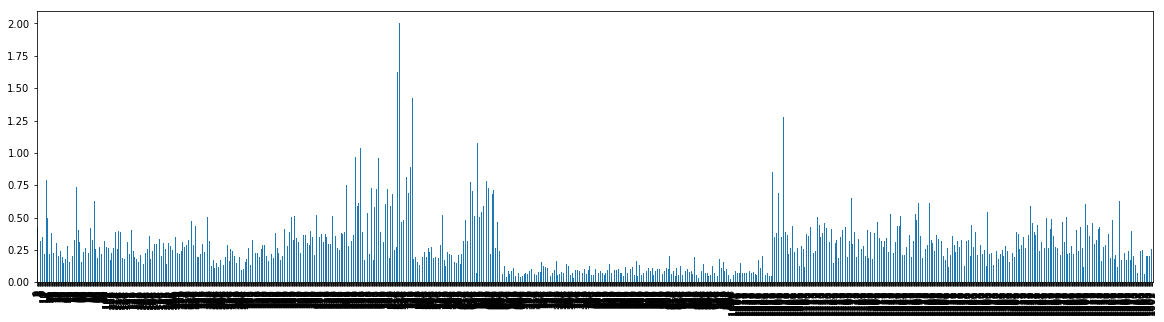

In [15]:
item_metrics = pd.DataFrame({'sMAPE': smape_values})
item_metrics['sMAPE'].plot(kind='bar', figsize=(20,5))

You can see the SMAPE is various, different store got different performance from this DeepAR model, which means sometimes one model could not cover all target time series.

In practice, we usually put the model online to predict those stores which have good preformance from the model and tune model (hyper paramenters, feature engineering) for other stores as well.

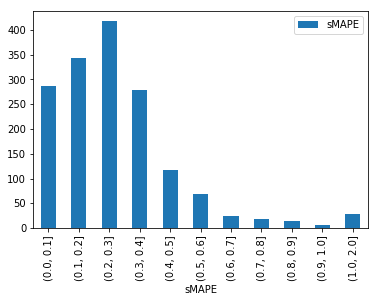

In [16]:
quartiles = pd.cut(item_metrics.sMAPE, [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 2])
def get_stats(group):
    return {'sMAPE': group.count()}
grouped = item_metrics.sMAPE.groupby(quartiles)
target_bucket_amount = grouped.apply(get_stats).unstack()
target_bucket_amount.plot(kind='bar')

Now let's check the result of DeepAR with category and dynamic_feat. 

In [17]:
result_new_features = pd.read_csv('data/deepar-new-features-predict-result.csv')
result_new_features.head()

,date,store_id,y_label,y_pred
0,2019-09-24,0,157.2,7.188352
1,2019-09-25,0,125.2,7.121572
2,2019-09-26,0,154.4,11.697053
3,2019-09-27,0,174.1,11.285398
4,2019-09-28,0,27.0,17.022421


In [23]:
result_new_features_group = result.groupby(['store_id'])
tss_new_features = []
forecasts_new_features = []
for name, group in result_new_features_group:
    ts = list(group['y_label'].values)
    forecast = list(group['y_pred'].values)
    tss_new_features.append(ts)
    forecasts_new_features.append(forecast)
target_new_features = np.array(tss_new_features)
forecast_new_features = np.array(forecasts_new_features)

In [24]:
smape_values_new_features = []
for i in range(len(target_new_features)):
    smape_value_new_features = smape(target_new_features[i], forecast_new_features[i])
    smape_values_new_features.append(smape_value_new_features)

Show result

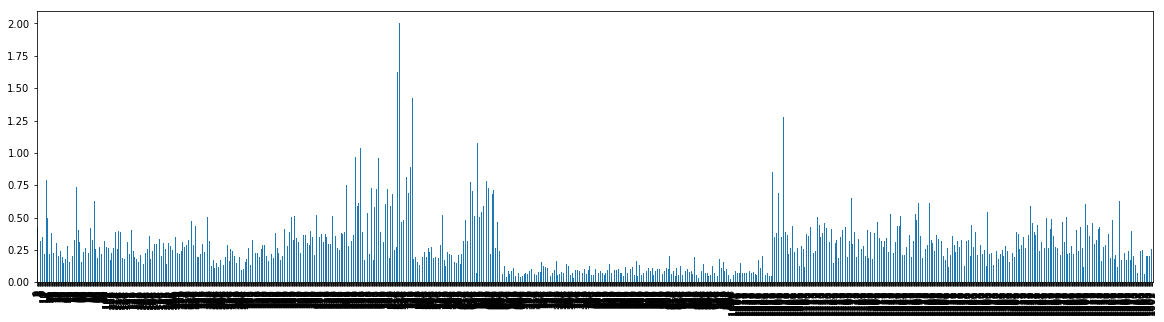

In [25]:
item_metrics_new_features = pd.DataFrame({'sMAPE': smape_values_new_features})
item_metrics_new_features['sMAPE'].plot(kind='bar', figsize=(20,5))

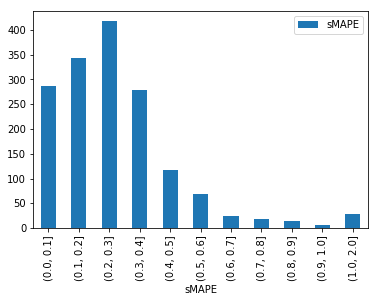

In [26]:
quartiles_new_features = pd.cut(item_metrics_new_features.sMAPE, [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 2])
def get_stats(group):
    return {'sMAPE': group.count()}
grouped_new_features = item_metrics_new_features.sMAPE.groupby(quartiles_new_features)
target_bucket_amount_new_features = grouped_new_features.apply(get_stats).unstack()
target_bucket_amount_new_features.plot(kind='bar')